In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [14]:
# Get data file path
file_name = 'df_fuel_ckan.csv'
file_path = os.path.join(os.getcwd(), 'data', file_name)

# csv file has 
df = pd.read_csv(file_path)

carbon_data = pd.DataFrame(df['CARBON_INTENSITY'].values, index=pd.to_datetime(df['DATETIME']))
annual_carbon = carbon_data.resample('YE').mean()
monthly_carbon = carbon_data.resample('ME').mean()
daily_carbon = carbon_data.resample('D').mean()
hourly_carbon = carbon_data.resample('h').mean()

# Truncate data after 2023-12-31 23:59:59
start_date = pd.Timestamp('2023-11-30 23:59:59').tz_localize('UTC')
stop_date = pd.Timestamp('2023-12-31 23:59:59').tz_localize('UTC')
annual_carbon = annual_carbon.truncate(after=stop_date)
monthly_carbon = monthly_carbon.truncate(after=stop_date)
daily_carbon = daily_carbon.truncate(after=stop_date)
hourly_carbon = hourly_carbon.truncate(after=stop_date)

# Check stationarity (from https://www.geeksforgeeks.org/sarima-seasonal-autoregressive-integrated-moving-average/)
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')

#def diff(timeseries, num):
#    diff_timeseries = timeseries.diff(periods=num)
#    diff_timeseries.dropna(inplace=True)
#    return diff_timeseries
#
#def diff_n(timeseries, num, n):
#    # carry out diff() n times
#    for _ in range(n):
#        diff_timeseries = diff(timeseries, num)
#    return diff_timeseries
#

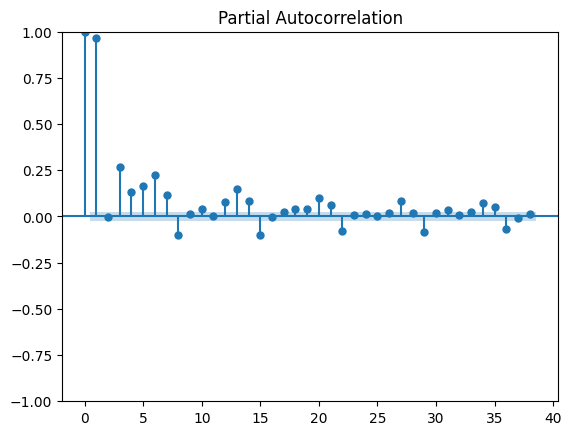

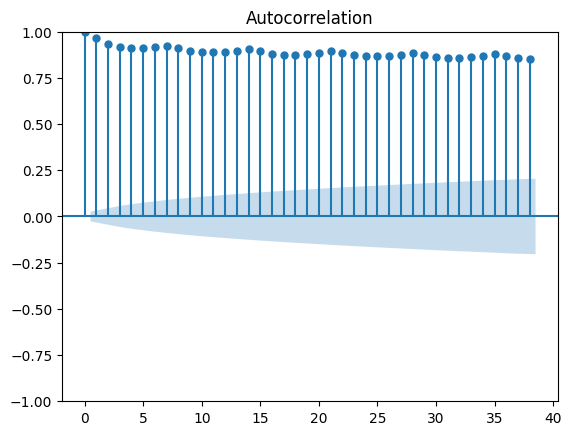

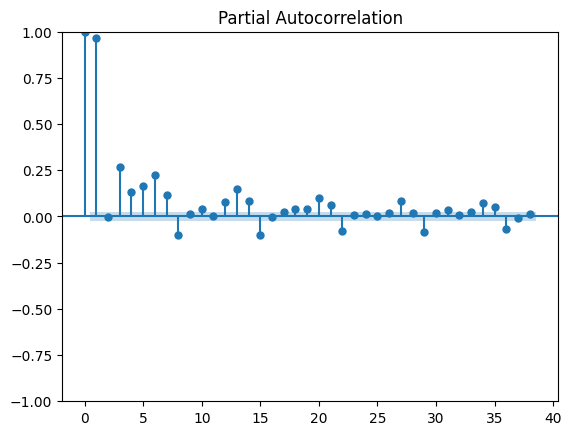

In [15]:
plot_acf(daily_carbon)
plot_pacf(daily_carbon)

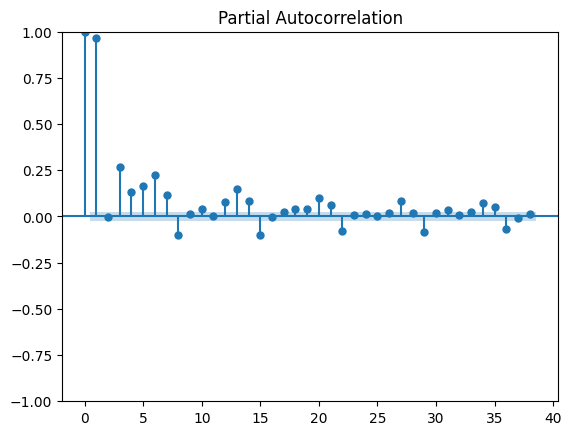

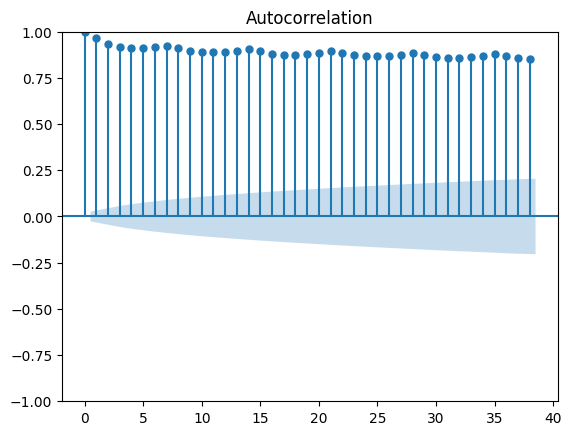

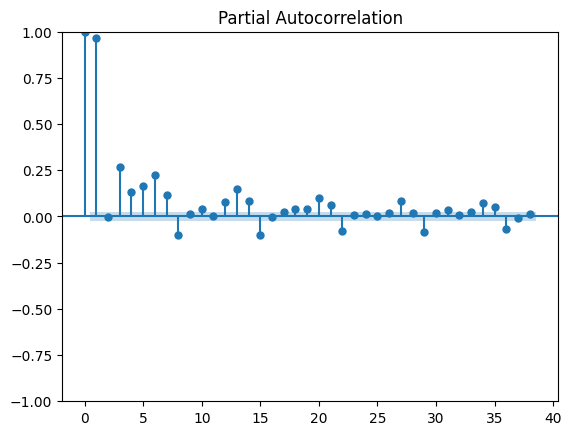

In [22]:
diff_1 = diff(daily_carbon, 0, 0, 0)
plot_acf(diff_1)
plot_pacf(diff_1)